## project_nutrients_review_positive

In [21]:
import numpy as np

In [22]:
import pandas as pd
df_review_positive = pd.read_csv('../datasets/reviews_data/all_preprocess_positive.csv')

In [23]:
df_review_positive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85805 entries, 0 to 85804
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         85805 non-null  int64  
 1   product_name       85805 non-null  object 
 2   review_date        85805 non-null  object 
 3   review_content     85805 non-null  object 
 4   review_star        85805 non-null  float64
 5   review_writer      85805 non-null  object 
 6   tokenized_reviews  85805 non-null  object 
 7   replaced_reviews   85805 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 5.2+ MB


In [24]:
df_review_positive = df_review_positive.dropna()

### LDA 분석

##### 문장 벡터화

In [25]:
from gensim.corpora import Dictionary

In [26]:
# 'replaced_review' 열의 모든 값을 문자열로 변환
df_review_positive['replaced_reviews'] = df_review_positive['replaced_reviews'].astype(str)

In [27]:
df_review_positive['replaced_reviews'] 

0        ['빨르다', '감마', '리놀렌산', '여성', '좋다', '다해', '초록색',...
1        ['상태', '깔끔하다', '좋다', '두번째', '구입', '월경', '증후군',...
2        ['상태', '깔끔하다', '좋다', '유트브', '구매', '피부', '염증', ...
3        ['상태', '깔끔하다', '크다', '아직', '모르다', '판매', '답글', ...
4        ['빨르다', '뛰어나다', '케이스', '보내다', '달라', '확인', '보내다...
                               ...                        
85800    ['빨르다', '뛰어나다', '아르기닌', '함량', '높다', '래서', '피로'...
85801                                      ['빨르다', '뛰어나다']
85802                                      ['빨르다', '뛰어나다']
85803                                 ['지인', '선물', '좋아하다']
85804                                             ['뛰어나다']
Name: replaced_reviews, Length: 85805, dtype: object

In [28]:
# negative_review = negative['preprocess_review'].apply(lambda x: x.split()).values
positive_review = df_review_positive['replaced_reviews'] .apply(lambda x: x.split()).values

In [30]:
dictionary = Dictionary(positive_review)
dictionary

In [31]:
# dictionary에 의한 한글 문장을 벡터화 변환
corpus_list = list()
for sentence in df_review_positive[['replaced_reviews']].values :
  vectors = dictionary.doc2bow(sentence)
  corpus_list.append(vectors)

In [32]:
df_review_positive['문장벡터화'] = corpus_list

In [33]:
df_review_positive[:3]

,Unnamed: 0,product_name,review_date,review_content,review_star,review_writer,tokenized_reviews,replaced_reviews,문장벡터화
0,0,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,2021.03.19,배송 빨라요 성능 보통이에요 유통기한 기한이 넉넉해요\r\n감마리놀렌산이 여성에게 ...,5.0,지오됴됴,"['배송', '빨르다', '성능', '보통', '유통', '기한', '기한', '넉...","['빨르다', '감마', '리놀렌산', '여성', '좋다', '다해', '초록색',...",[]
1,1,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,2023.07.05,유통기한 기한이 넉넉해요 포장상태 포장이 깔끔해요 효과 효과 좋아요\r\n두번째 구...,5.0,ju82**,"['유통', '기한', '기한', '넉넉하다', '포장', '상태', '포장', '...","['상태', '깔끔하다', '좋다', '두번째', '구입', '월경', '증후군',...",[]
2,2,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,2023.09.20,유통기한 기한이 넉넉해요 포장상태 포장이 깔끔해요 효과 효과 좋아요\r\n유트브 보...,5.0,sns2**,"['유통', '기한', '기한', '넉넉하다', '포장', '상태', '포장', '...","['상태', '깔끔하다', '좋다', '유트브', '구매', '피부', '염증', ...",[]


##### 토픽 잡기(review_positive)
- review_positive.csv 토픽 분석
- 토픽 수 9 <<<<<<< 변경하기 

In [34]:
from gensim.models import LdaModel

In [35]:
lda_model = LdaModel(corpus=corpus_list, id2word=dictionary, num_topics=9)

In [15]:
lda_model.print_topics(num_words=4)

[(0,
  '0.165*"[]" + 0.017*"[\'가격\', \'괜찮다\', \'좋다\']" + 0.007*"[\'빨르다\', \'뛰어나다\', \'재다\']" + 0.007*"[\'상태\', \'좋다\']"'),
 (1,
  '0.029*"[\'빨르다\', \'뛰어나다\', \'감사하다\']" + 0.009*"[\'가격\', \'싸다\', \'사다\']" + 0.005*"[\'맛있다\', \'좋다\']" + 0.003*"[\'빨르다\', \'뛰어나다\', \'좋다\', \'재다\']"'),
 (2,
  '0.068*"[\'상태\', \'깔끔하다\']" + 0.011*"[\'감사하다\']" + 0.009*"[\'뛰어나다\', \'좋다\']" + 0.007*"[\'빨르다\', \'뛰어나다\', \'제품\']"'),
 (3,
  '0.159*"[\'빨르다\']" + 0.037*"[\'상태\']" + 0.025*"[\'빨르다\', \'맛있다\', \'좋다\']" + 0.010*"[\'빨르다\', \'뛰어나다\', \'꾸준하다\']"'),
 (4,
  '0.033*"[\'빨르다\', \'좋다\']" + 0.019*"[\'빨르다\', \'맛있다\']" + 0.002*"[\'빨르다\', \'뛰어나다\', \'아직\', \'모르다\', \'좋다\']" + 0.000*"[\'빨르다\', \'맛있다\', \'좋다\', \'감사하다\']"'),
 (5,
  '0.138*"[\'가격\', \'괜찮다\']" + 0.109*"[\'뛰어나다\']" + 0.006*"[\'가격\', \'괜찮다\', \'빨르다\', \'좋다\']" + 0.004*"[\'가격\', \'싸다\', \'사다\', \'빨르다\', \'감사하다\']"'),
 (6,
  '0.231*"[\'상태\', \'깔끔하다\', \'좋다\']" + 0.045*"[\'좋다\']" + 0.013*"[\'빨르다\', \'뛰어나다\', \'만족하다\']" + 0.004*"[\'빨르다\', \'뛰어나다\', \'주문\']"'),


##### 최적에 토픽 단어 수

In [17]:
sentences = df_review_positive['replaced_reviews']
sentences

0        ['빨르다', '감마', '리놀렌산', '여성', '좋다', '다해', '초록색',...
1        ['상태', '깔끔하다', '좋다', '두번째', '구입', '월경', '증후군',...
2        ['상태', '깔끔하다', '좋다', '유트브', '구매', '피부', '염증', ...
3        ['상태', '깔끔하다', '크다', '아직', '모르다', '판매', '답글', ...
4        ['빨르다', '뛰어나다', '케이스', '보내다', '달라', '확인', '보내다...
                               ...                        
85800    ['빨르다', '뛰어나다', '아르기닌', '함량', '높다', '래서', '피로'...
85801                                      ['빨르다', '뛰어나다']
85802                                      ['빨르다', '뛰어나다']
85803                                 ['지인', '선물', '좋아하다']
85804                                             ['뛰어나다']
Name: replaced_reviews, Length: 85805, dtype: object

In [18]:
type(sentences)

pandas.core.series.Series

In [18]:
# 각 문장을 공백으로 나누어 리스트에 저장
tokenized_sentences = [sentence.split() for sentence in sentences]

In [19]:
# 결과 출력
morphs_list = list()
for tokens in tokenized_sentences:
    morphs_list.append(tokens)
morphs_list

[["['빨르다',",
  "'감마',",
  "'리놀렌산',",
  "'여성',",
  "'좋다',",
  "'다해',",
  "'초록색',",
  "'엄청',",
  "'비교',",
  "'해보다',",
  "'브리',",
  "'결정',",
  "'함량',",
  "'높다',",
  "'과정',",
  "'마음',",
  "'믿다',",
  "'구매',",
  "'좋다',",
  "'알약',",
  "'개봉시',",
  "'터지다',",
  "'주의',",
  "'껍질',",
  "'제거',",
  "'습관',",
  "'누르다',",
  "'터지다',",
  "'얼른',",
  "'양제',",
  "'실선',",
  "'좋다',",
  "'가위']"],
 ["['상태',",
  "'깔끔하다',",
  "'좋다',",
  "'두번째',",
  "'구입',",
  "'월경',",
  "'증후군',",
  "'구입',",
  "'모르다',",
  "'영향',",
  "'다시',",
  "'주문',",
  "'알약',",
  "'크기',",
  "'크다',",
  "'편입',",
  "'판매',",
  "'답글',",
  "'판매',",
  "'안녕하다',",
  "'고객',",
  "'브리',",
  "'제품',",
  "'구매',",
  "'해주다',",
  "'대단하다',",
  "'감사하다',",
  "'브리',",
  "'제품',",
  "'고객',",
  "'건강',",
  "'많다',",
  "'도움',",
  "'좋다',",
  "'문의사항',",
  "'연락',",
  "'줄다',",
  "'감사하다',",
  "'브리',",
  "'올리다']"],
 ["['상태',",
  "'깔끔하다',",
  "'좋다',",
  "'유트브',",
  "'구매',",
  "'피부',",
  "'염증',",
  "'좋다',",
  "'판매',",
  "'답글',",
  "'판매',",
  "'안녕하다',",
  "'고객',",
  "'브리',",
  "'제품'

In [21]:
preprocessed_sentences = morphs_list

In [22]:
dictionary = Dictionary(preprocessed_sentences) # fix in like sklean
dictionary

In [24]:
# 일관성 점수
from gensim.models.coherencemodel import CoherenceModel
coherenceModel = CoherenceModel(model=lda_model, texts=morphs_list, dictionary=dictionary)
coherenceModel.get_coherence()

KeyError: 32314

In [51]:
# 혼잡도 점수
lda_model.log_perplexity(corpus_list)

-18.37416786229092

In [52]:
start_topic = 2
end_topic = 10
coherence_scores = list()
perplexity_scores = list()
for topic_number in range(start_topic, end_topic+1):
    best_lda_model = LdaModel(corpus=corpus_list, id2word=dictionary, num_topics=topic_number) # fix
    coherenceModel = CoherenceModel(model=best_lda_model, texts=morphs_list, dictionary=dictionary)
    coherence_scores.append(coherenceModel.get_coherence()) # 일관성 점수
    perplexity_scores.append(best_lda_model.log_perplexity(corpus_list))

IndexError: index 19008 is out of bounds for axis 1 with size 19008

In [ ]:
# index 19008 is out of bounds for axis 1 with size 19008

In [7]:
import pandas as pd
scores = pd.DataFrame([coherence_scores,  perplexity_scores]).T
scores

,0,1


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

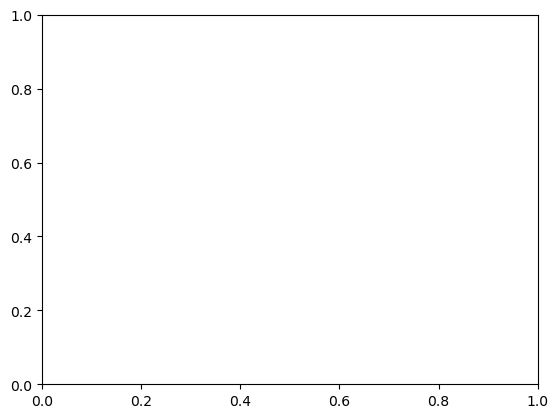

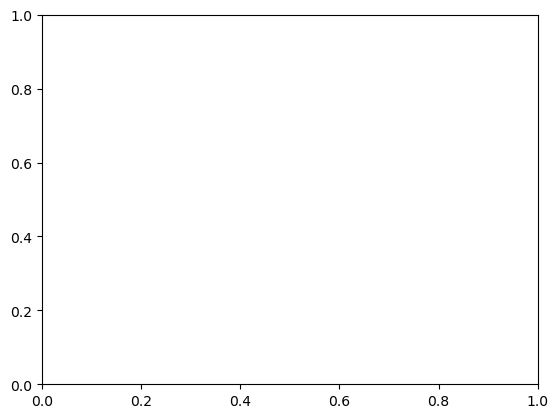

In [23]:
sns.lineplot(coherence_scores)
plt.show()
sns.lineplot(perplexity_scores)
plt.show()

##### LDA 시각화

In [28]:
import pyLDAvis.gensim_models

In [ ]:
pyLDAvis.enable_notebook() # 일반적인 python에선 불필요
result_visualized = pyLDAvis.gensim_models.prepare(lda_model, corpus_list, dictionary)

In [25]:
pyLDAvis.display(result_visualized)

NameError: name 'pyLDAvis' is not defined

In [26]:
pyLDAvis.save_html(result_visualized, '../project_nutrients_review_positive_result_visualized.html')

NameError: name 'pyLDAvis' is not defined